<a href="https://colab.research.google.com/github/sheshank1436/pytorch/blob/master/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [69]:
dataset=MNIST(root='C:\\Users\\shkatta\\Desktop\\AI\\csv files',download=True)

In [70]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\shkatta\Desktop\AI\csv files
    Split: Train

In [71]:
len(dataset)

60000

In [72]:
test_dataset=MNIST(root='C:\\Users\\shkatta\\Desktop\\AI\\csv files',train=False)

In [73]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5FE50AA7F0>, 5)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline


label 5


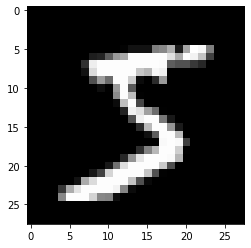

In [75]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("label",label)

In [76]:
#from the above we can see the images but there size is very small
#one problem with PyTorch is it doesn't know how to work with images
#we need to convert them to tensors
#we can do this by specifying the transform
import torchvision.transforms as transforms

In [77]:
dataset=MNIST(root='C:\\Users\\shkatta\\Desktop\\AI\\csv files',train=True,transform=transforms.ToTensor())

In [78]:
#image is gray scale so it has only 1-dimension
image,label=dataset[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 5


In [79]:
#let us print some values inside the image
#in the below values 0 represents black and 1 represents white
#values in btw 0 and 1 represent different shades of gray
print(image[:,10:17,17:22])
print(torch.max(image),torch.min(image))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4667, 0.0980, 0.0000, 0.0000, 0.0000],
         [0.9922, 0.5882, 0.1059, 0.0000, 0.0000],
         [0.9882, 0.9922, 0.7333, 0.0000, 0.0000]]])
tensor(1.) tensor(0.)


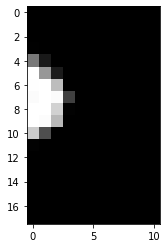

In [80]:
#now lets plot some part of the image and see what does it contain
plt.imshow(image[0,10:115,17:222],cmap="gray")

In [81]:
#lets divide our training data into train and validation 
#we will split the data randomly because the train data might be ordered based on target values
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
print(len(train_ds),len(val_ds))

50000 10000


In [82]:
#from the linear regression which we created earlier we know that we need to have the data present in the form of batches
#for that we use a dataloader
from torch.utils.data import DataLoader

In [83]:
batch_size=128
tr_load=DataLoader(train_ds,batch_size=batch_size,shuffle=True)
val_load=DataLoader(val_ds,batch_size=batch_size)


In [84]:
#Now we need to create the model 
#logistic regression is almost similar to the linear regression model
#nn.linear expect the input to be in the form of a vector
# so we flatten the images of size 1*28*28 to 784(28*28) before passing it to the model
#the output of each image is a vector of size 10 where each element determines the prob of each class
#the element having  highest prob will be the predicted output
import torch.nn as nn
input_size=28*28
num_classes=10
#logistic regression model
model=nn.Linear(input_size,num_classes)


In [85]:
print(model.weight.shape)

torch.Size([10, 784])


In [86]:
print(model.bias.shape)

torch.Size([10])


In [87]:
#now let us make some predictions
#here in the img shape first dimension represent the batchsize
for img,label in tr_load:
  print(label)
  print(img.shape)
  out=model(img)
  print(out)
  break

tensor([3, 3, 9, 6, 5, 6, 7, 9, 2, 1, 4, 6, 7, 6, 7, 2, 8, 1, 6, 3, 3, 3, 5, 9,
        0, 0, 4, 2, 0, 9, 7, 3, 5, 5, 7, 4, 8, 8, 5, 3, 0, 4, 4, 4, 3, 6, 2, 0,
        9, 6, 4, 8, 0, 3, 6, 0, 8, 5, 3, 4, 8, 1, 0, 2, 5, 5, 5, 2, 6, 6, 5, 5,
        1, 2, 0, 8, 5, 9, 6, 1, 5, 0, 5, 5, 5, 9, 7, 4, 9, 2, 7, 3, 7, 1, 7, 0,
        0, 0, 6, 7, 2, 8, 5, 2, 7, 8, 9, 9, 4, 8, 1, 9, 9, 7, 8, 2, 3, 3, 4, 0,
        5, 8, 1, 3, 0, 6, 3, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [88]:
#in the above error occured because the model expects the input to have one shape and it got some other shape
#the point is we need to flatten the inputs before feeding them to the model
#OUR Images are of shape 28*28 but we need to have a vector of size 784
#array will be in them form of a matrix with n dimensions
#vector will be in the form of a list
#Now the solution to this problem is we need to use the .reshape function of tensors to convert the images into vectors
#To include this additional functionality within our model, we need to define a custom model
#the way to define the custom model in pytorch is by using the nn.Module
#firstline is the syntax for extending the class in pytorch
#line 2 is constructor
#line 3 is called when you instantiate the class or when you create the object of the class
# we give -1 in reshape function so the function will predict what should be the value in that place

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)
  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out
    
model=MnistModel()

In [89]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [90]:
print(model.linear.bias.shape)

torch.Size([10])


In [91]:
list(model.parameters())

[Parameter containing:
 tensor([[-2.8194e-02, -7.6404e-04,  9.8564e-05,  ..., -1.7038e-02,
          -1.1669e-02, -1.4908e-02],
         [ 3.5041e-02,  3.2869e-02, -2.3298e-02,  ...,  2.8538e-03,
           1.7733e-02,  3.5155e-02],
         [-1.4683e-02,  1.2461e-02, -1.6134e-02,  ..., -3.2839e-02,
           1.7883e-02,  2.4404e-02],
         ...,
         [-3.7150e-03, -2.6605e-02,  2.7084e-02,  ...,  3.5290e-02,
           3.0128e-03,  3.0019e-02],
         [-3.0568e-02,  2.6771e-02,  3.4347e-02,  ..., -2.8651e-02,
          -1.4811e-02, -3.4193e-02],
         [ 3.3422e-02, -4.9376e-03,  2.8521e-02,  ..., -2.2710e-02,
          -3.9817e-03, -4.1283e-04]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0273,  0.0140,  0.0335, -0.0092, -0.0212,  0.0222, -0.0108,  0.0113,
         -0.0172, -0.0237], requires_grad=True)]

In [92]:
for img,label in tr_load:

  out=model(img)
  break

In [93]:
out[0]

tensor([ 0.0175, -0.0056,  0.1120,  0.3575, -0.1476, -0.2937, -0.0612,  0.2531,
        -0.3779, -0.2913], grad_fn=<SelectBackward>)

In [95]:
#From the above we can see that each output has 10 elements 
#we need to use exp to rescale the outputs 
exp=torch.exp(out[0])


In [96]:
#From the above we can see that each output has 10 elements 
#But still the output elements are not in btw 0 and 1
#when we sum all the values of the output it should be equal to 1
#we can get that by performing the following function
prb=exp/torch.sum(exp)

prb

tensor([0.1035, 0.1012, 0.1138, 0.1454, 0.0878, 0.0758, 0.0957, 0.1310, 0.0697,
        0.0760], grad_fn=<DivBackward0>)

In [97]:
torch.sum(prb)

tensor(1., grad_fn=<SumBackward0>)

In [98]:
#we can perform the above function on the whole data using the softmax function
import torch.nn.functional as F

In [107]:
#apply softmax for each output row
#dim=1 because we apply softmax to image
#dim=0 represents batch size
probs=F.softmax(out,dim=1)
print("sample probabilites \n", probs[:2].data)
print(torch.sum(probs[0]).item())

sample probabilites 
 tensor([[0.1035, 0.1012, 0.1138, 0.1454, 0.0878, 0.0758, 0.0957, 0.1310, 0.0697,
         0.0760],
        [0.0798, 0.0925, 0.1021, 0.1266, 0.0896, 0.0950, 0.1423, 0.1113, 0.0919,
         0.0690]])
0.9999998807907104


In [119]:
for images,labels in tr_load:
  print(images.shape)
  outputs=model(images)
  break
print(outputs.shape)
print(outputs[:2].data)



torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([[-0.2462,  0.1198, -0.2730,  0.4348, -0.0394, -0.2031,  0.0377, -0.0082,
          0.1137, -0.3590],
        [-0.1171, -0.0539, -0.1581, -0.0420, -0.0230, -0.2561,  0.0794,  0.0702,
         -0.0352, -0.2438]])


In [121]:
#first variable gives the max value from output 10 elements
#second value will give its respective index
max_probs,preds=torch.max(probs,dim=1)


In [122]:
max_probs

tensor([0.1454, 0.1423, 0.1253, 0.1222, 0.1188, 0.1146, 0.1221, 0.1687, 0.1299,
        0.1291, 0.1236, 0.1455, 0.1271, 0.1252, 0.1243, 0.1132, 0.1232, 0.1257,
        0.1306, 0.1334, 0.1290, 0.1303, 0.1276, 0.1279, 0.1400, 0.1362, 0.1150,
        0.1422, 0.1170, 0.1332, 0.1526, 0.1554, 0.1559, 0.1520, 0.1488, 0.1217,
        0.1309, 0.1292, 0.1232, 0.1261, 0.1251, 0.1291, 0.1298, 0.1152, 0.1230,
        0.1138, 0.1329, 0.1298, 0.1150, 0.1376, 0.1205, 0.1282, 0.1242, 0.1329,
        0.1405, 0.1628, 0.1365, 0.1300, 0.1354, 0.1368, 0.1370, 0.1203, 0.1229,
        0.1269, 0.1193, 0.1262, 0.1825, 0.1460, 0.1327, 0.1240, 0.1453, 0.1274,
        0.1148, 0.1164, 0.1216, 0.1416, 0.1394, 0.1181, 0.1175, 0.1442, 0.1406,
        0.1358, 0.1351, 0.1407, 0.1198, 0.1248, 0.1239, 0.1554, 0.1344, 0.1333,
        0.1182, 0.1208, 0.1572, 0.1262, 0.1352, 0.1587, 0.1280, 0.1540, 0.1313,
        0.1457, 0.1149, 0.1374, 0.1236, 0.1595, 0.1301, 0.1494, 0.1230, 0.1175,
        0.1486, 0.1294, 0.1123, 0.1293, 

In [124]:
preds

tensor([3, 6, 8, 2, 3, 7, 3, 3, 6, 1, 1, 7, 7, 8, 3, 8, 6, 6, 3, 3, 7, 3, 7, 7,
        3, 7, 6, 7, 3, 7, 7, 7, 3, 1, 3, 7, 3, 7, 2, 7, 7, 6, 7, 7, 2, 4, 3, 7,
        7, 7, 6, 7, 7, 7, 2, 3, 7, 6, 7, 3, 7, 6, 3, 7, 3, 3, 7, 1, 3, 3, 3, 3,
        0, 7, 3, 3, 3, 7, 6, 1, 3, 7, 3, 7, 7, 7, 7, 6, 3, 7, 3, 1, 3, 7, 7, 3,
        3, 3, 7, 3, 1, 3, 3, 7, 7, 3, 2, 6, 3, 3, 4, 6, 2, 7, 3, 7, 3, 3, 7, 0,
        6, 7, 3, 7, 7, 3, 7, 6])

In [125]:
#actual outputs
labels

tensor([6, 8, 4, 1, 4, 0, 1, 7, 2, 6, 9, 9, 3, 5, 1, 5, 9, 7, 1, 1, 3, 6, 8, 9,
        4, 8, 2, 1, 4, 2, 3, 1, 0, 2, 7, 0, 0, 0, 4, 6, 3, 3, 0, 5, 1, 6, 2, 1,
        4, 6, 2, 7, 2, 4, 3, 4, 7, 5, 6, 2, 7, 6, 0, 5, 4, 0, 2, 9, 5, 3, 5, 4,
        5, 8, 0, 4, 0, 4, 3, 0, 0, 0, 2, 9, 9, 6, 3, 5, 6, 3, 1, 2, 4, 6, 2, 9,
        6, 8, 1, 8, 9, 2, 3, 6, 8, 4, 1, 8, 8, 8, 8, 7, 9, 3, 4, 1, 7, 0, 5, 6,
        2, 2, 3, 3, 2, 2, 7, 0])

In [129]:
#now we need to evualuate our model by doing the element wise comparision
def accuracy(output,label):
  max_probs,index=torch.max(output,dim=1)
  return torch.tensor(torch.sum(preds==label).item()/len(preds))


In [131]:
accuracy(outputs,labels)

tensor(0.0625)

In [132]:
#we will not provide the probability for comparision of actual with pred
#we calculate the loss in the classification problems is cross entropy
#we wont use gradient descent because pred output is not differentiable
#cross entropy is the negative log of predicted prob of the corrected label averged over all the training samples
loss_fn=F.cross_entropy

In [134]:
#loss for current batch of data
loss=loss_fn(outputs,labels)

In [135]:
print(loss)

tensor(2.3247, grad_fn=<NllLossBackward>)


In [136]:
#Now we are going to train the model 
#this will be indentical to the linear regression
'''
for ep in range(epoch):
  for batch in tr_load:
    #model prediction
    #calculate loss
    #calculate gradients
    #update the parameters(weights and biases) using gradients
    #reset the gradients 

  
  for batch in val_load:
    #model prediction
    #calculate loss 
    #generate metrics(accuracy) 
 #calculate average loss and metrics
      
      
      
      
      
      '''

'\ndef fit(epoch,model,loss,opt,train):\n  for ep in range(epoch):\n    for batch in tr_load:\n      #model prediction\n      #calculate loss\n      #calculate gradients\n      #update the parameters(weights and biases) using gradients\n      #reset the gradients '